# Project - Stock - Invest or Not

#### Import libraries

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

from scipy.stats import kendalltau

In [3]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By

#### Get Current working directory path to store the downloads

In [67]:
download_path = os.getcwd()

In [68]:
chrome_options = webdriver.ChromeOptions()
prefs = {'download.default_directory' : download_path}
chrome_options.add_experimental_option('prefs', prefs)
driver = webdriver.Chrome(chrome_options=chrome_options)

/var/folders/rt/dvbs8vnx1fvc_hz1f8sbq9vm0000gn/T/ipykernel_6462/1202327101.py:4: DeprecationWarning: use options instead of chrome_options
  driver = webdriver.Chrome(chrome_options=chrome_options)


#### Load website to scrape data

In [82]:
driver.get("https://finance.yahoo.com/")

#### Enter the keyword in the website search bar

In [83]:
driver.find_element("name","yfin-usr-qry").send_keys("ITC.NS")

#### Search for keyword in the website search bar

In [84]:
driver.find_element("id","header-desktop-search-button").send_keys(Keys.ENTER)

#### Navigate to historic data tab on the website

In [85]:
historic_data_page_url = driver.find_elements(By.XPATH, '//*[@id="quote-nav"]/ul/li[5]/a')[0].get_attribute('href')

In [86]:
driver.get(historic_data_page_url)

#### Click on the dropdown menu

In [87]:
driver.find_elements(By.XPATH, '//*[@id="Col1-1-HistoricalDataTable-Proxy"]/section/div[1]/div[1]/div[1]/div/div/div')[0].send_keys(Keys.ENTER)

#### Click on 5Y to get 5 years of data.

In [88]:
driver.find_elements(By.XPATH, '//*[@id="dropdown-menu"]/div/ul[2]/li[3]/button')[0].send_keys(Keys.ENTER)

#### Click on 1Y to get 1 year of data.

In [93]:
driver.find_elements(By.XPATH, '//*[@id="dropdown-menu"]/div/ul[2]/li[2]/button')[0].send_keys(Keys.ENTER)

In [94]:
driver.find_elements(By.XPATH, '//*[@id="Col1-1-HistoricalDataTable-Proxy"]/section/div[1]/div[1]/button')[0].send_keys(Keys.ENTER)

In [95]:
download_page_url = driver.find_elements(By.XPATH, '//*[@id="Col1-1-HistoricalDataTable-Proxy"]/section/div[1]/div[2]/span[2]/a')[0].get_attribute('href')

In [96]:
download_page_url

'https://query1.finance.yahoo.com/v7/finance/download/ITC.NS?period1=1637971200&period2=1669507200&interval=1d&events=history&includeAdjustedClose=true'

In [97]:
driver.get(download_page_url)

In [100]:

csv_file = [item for item in os.listdir() if "csv" in item]
csv_file

['ITC.NS.csv']

In [103]:
df = pd.read_csv(csv_file[0])
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-11-29,222.000000,223.649994,220.199997,221.500000,211.535431,22132952
1,2021-11-30,222.000000,225.199997,220.000000,221.149994,211.201157,23503453
2,2021-12-01,222.000000,223.300003,220.600006,221.899994,211.917419,12995800
3,2021-12-02,221.899994,226.149994,221.300003,225.449997,215.307724,15904846
4,2021-12-03,225.000000,226.199997,221.350006,221.649994,211.678665,13794647


In [104]:
os.remove(csv_file[0])

In [105]:
df.shape

(248, 7)

#### Read data

In [22]:
df_1y = pd.read_csv("data_1y.csv")
df_1y.shape

(248, 7)

In [23]:
df_1y.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-11-29,222.000000,223.649994,220.199997,221.500000,211.535431,22132952
1,2021-11-30,222.000000,225.199997,220.000000,221.149994,211.201157,23503453
2,2021-12-01,222.000000,223.300003,220.600006,221.899994,211.917419,12995800
3,2021-12-02,221.899994,226.149994,221.300003,225.449997,215.307724,15904846
4,2021-12-03,225.000000,226.199997,221.350006,221.649994,211.678665,13794647


<AxesSubplot: xlabel='Date'>

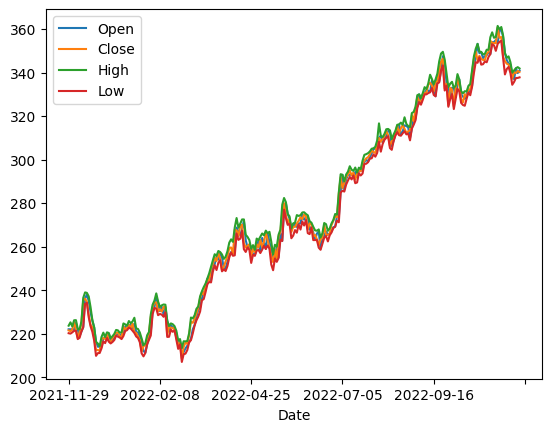

In [29]:
df_1y.set_index('Date')[['Open','Close','High','Low']].plot()

In [6]:
df_1y = df_1y[['Date','Open']]
df_1y.head()

,Date,Open
0,2021-11-29,222.000000
1,2021-11-30,222.000000
2,2021-12-01,222.000000
3,2021-12-02,221.899994
4,2021-12-03,225.000000


In [7]:
df_1y.set_index('Date')

,Open
Date,
2021-11-29,222.000000
2021-11-30,222.000000
2021-12-01,222.000000
2021-12-02,221.899994
2021-12-03,225.000000
...,...
2022-11-21,339.100006
2022-11-22,337.000000
2022-11-23,342.000000


<AxesSubplot: >

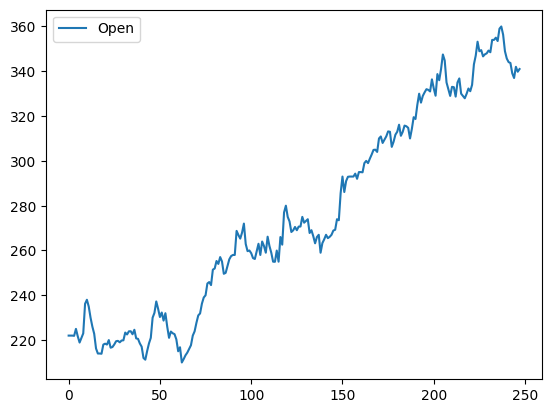

In [12]:
df_1y.plot()

In [14]:
index_list = [item for item in range(1,len(df_1y)+1)]
len(index_list)

248

In [17]:
df_1y['Index'] = index_list
df_1y.head()

,Date,Open,Index
0,2021-11-29,222.000000,1
1,2021-11-30,222.000000,2
2,2021-12-01,222.000000,3
3,2021-12-02,221.899994,4
4,2021-12-03,225.000000,5


In [18]:
df_1y['Index']

0        1
1        2
2        3
3        4
4        5
      ... 
243    244
244    245
245    246
246    247
247    248
Name: Index, Length: 248, dtype: int64

In [20]:
corr, _ = kendalltau(df_1y['Index'], df_1y['Open'])
print("Kendall Tau Correlation: %.2f" % corr)

Kendall Tau Correlation: 0.84
